In [38]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import fetch_california_housing, make_regression
from sklearn.model_selection import train_test_split

# Generating Data

This creates a set of 100 data points, each of which has 1 feature, in an approximately linear pattern.
The “approximately” is controlled by the parameter noise, which feeds in Gaussian noise. 
The larger the value of noise, the more the points are scattered.

In [39]:
X, y = make_regression(n_samples=100, n_features=1, noise = 2)

# Splitting Data

Splits the data that was previously generated (instead of data that is loaded).

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training

In [41]:
regr = linear_model.LinearRegression() 
regr.fit(X_train, y_train)

LinearRegression()

# Scores

In [42]:
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

print('Variance score: %.2f' % regr.score(X_test, y_test))

Mean squared error: 5.30
Variance score: 1.00


# Plotting Outputs

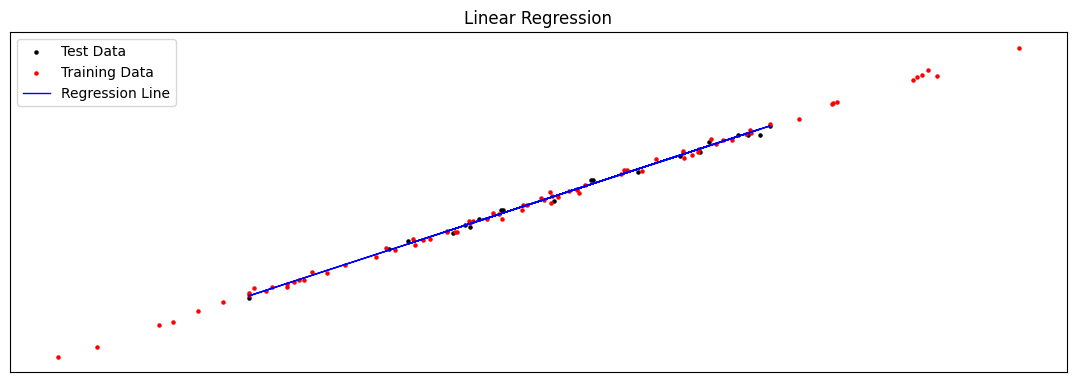

In [43]:
plt.figure(figsize=(30, 15))

plt.subplot(3, 2, 1)
plt.title("Linear Regression")

plt.scatter(X_test, y_test, color='black', s=5, label="Test Data")  # Test data
plt.scatter(X_train, y_train, color='red', s=5, label="Training Data")  # Training data
plt.plot(X_test, regr.predict(X_test), color='blue', linewidth=1, label="Regression Line")  # The line we learnt

plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()

# Custom Gradient Descent

1. Implement gradient descent as described above.
2. Plot the error/learning curve.
3. Compute the mean squared error for your model on your test data.
4. Modify your model (especially learning rate and the number of times the training data is used) until it performs as well as the scikit-learn built in method.
5. Vary the noise in the dataset and see how well your learning method compares with the scikit-learn method.

### Parameters

In [44]:
alpha = 0.001  # Learning rate
repeats = 200

## Stochastic Gradient Descent

### Initial Values

In [45]:
w0 = 0
w1 = 0
errors = []
points = []

### Running Gradient Descent

In [46]:
for j in range(repeats):
    for i in range(len(X_train)):

        # compute error
        predict = w0 + (X_train[i] * w1)
        error = y_train[i] - predict
        errors.append(error)             # Stash the error in an array

        # Update weights
        w0 = w0 + (alpha * error)
        w1 = w1 + ((alpha * error) * X_train[i])


print("w0: %2f" % w0.item())
print("w1: %2f" % w1.item())

w0: -0.082194
w1: 51.093003


### Compute mean using the testing data

In [47]:
predicts = []
mean_error = 0
for i in range(len(X_test)):
    predict = w0 + (X_test[i] * w1)
    error = (y_test[i] - predict) ** 2 # Computing squared error
    mean_error  += error
    predicts.append(predict)

mean_error = mean_error / len(X_test) # Computing mean squared error
print("Mean squared error: %2f" % mean_error.item())


Mean squared error: 5.302668


### Plotting

Plot the examples with the predictions and the squared error evolution

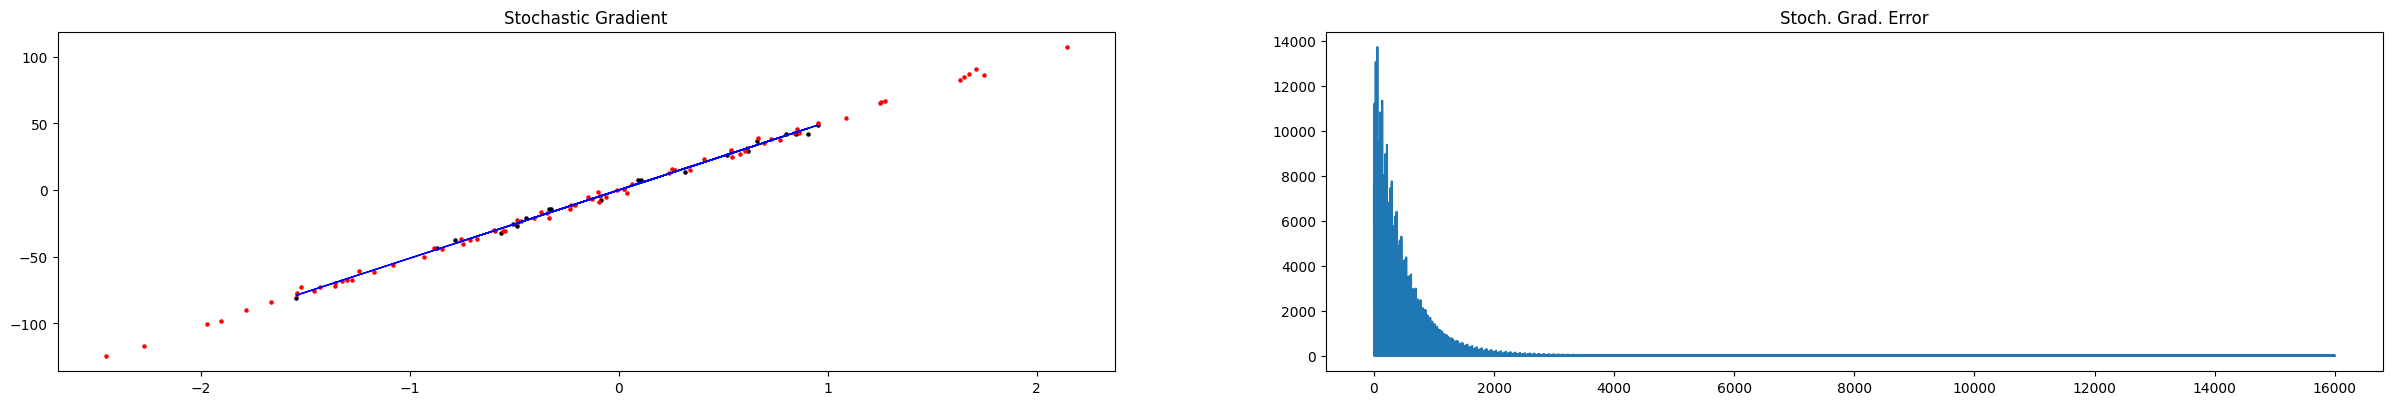

In [48]:
for i in range(len(errors)):
    errors[i] = errors[i] ** 2
    points.append(i)

plt.figure(figsize=(30, 15))
plt.subplot( 3, 2, 3 )
plt.title("Stochastic Gradient")
plt.scatter(X_test, y_test, color="black",s=5)
plt.scatter(X_train, y_train, color="red",s=5)
plt.plot(X_test, predicts, color='blue', linewidth=1) # The line we learnt

plt.subplot( 3, 2, 4 )
plt.title("Stoch. Grad. Error")
plt.plot(points, errors)

## Batch Gradient Descent

### Initial Values

Resetting the initial values from [Stochastic Gradient Descent](#stochastic-gradient-descent)

In [49]:
w0 = 0
w1 = 0
errors = []
points = []

In [50]:
for j in range(repeats):
    error_sum = 0
    squared_error_sum = 0
    error_sum_x = 0
    for i in range(len(X_train)):

        # compute error
        predict = w0 + (X_train[i] * w1)
        squared_error_sum = squared_error_sum + (y_train[i]-predict)**2     # Error to produce plot
        error_sum = error_sum + y_train[i] - predict                        # Error to update w0
        error_sum_x = error_sum_x + (y_train[i] - predict) * X_train[i]       # Error to update w1

    # Update weights and append error
    w0 = w0 + (alpha * error_sum)
    w1 = w1 + (alpha * error_sum_x)
    errors.append(squared_error_sum/len(X_train))           # Stash the error in an array

print("w0: %2f" % w0.item())
print("w1: %2f" % w1.item())



w0: -0.081410
w1: 51.097164


### Compute mean using the testing data

In [51]:
predicts = []
mean_error = 0
for i in range(len(X_test)):
    predict = w0 + (X_test[i] * w1)
    error = (y_test[i] - predict) ** 2      # Computing squared error
    mean_error  += error
    predicts.append(predict)

mean_error = mean_error / len(X_test)       # Computing mean squared error

print("Mean squared error: %2f" % mean_error.item())

Mean squared error: 5.304153


### Plotting

Plot the examples with the predictions and the squared error evolution

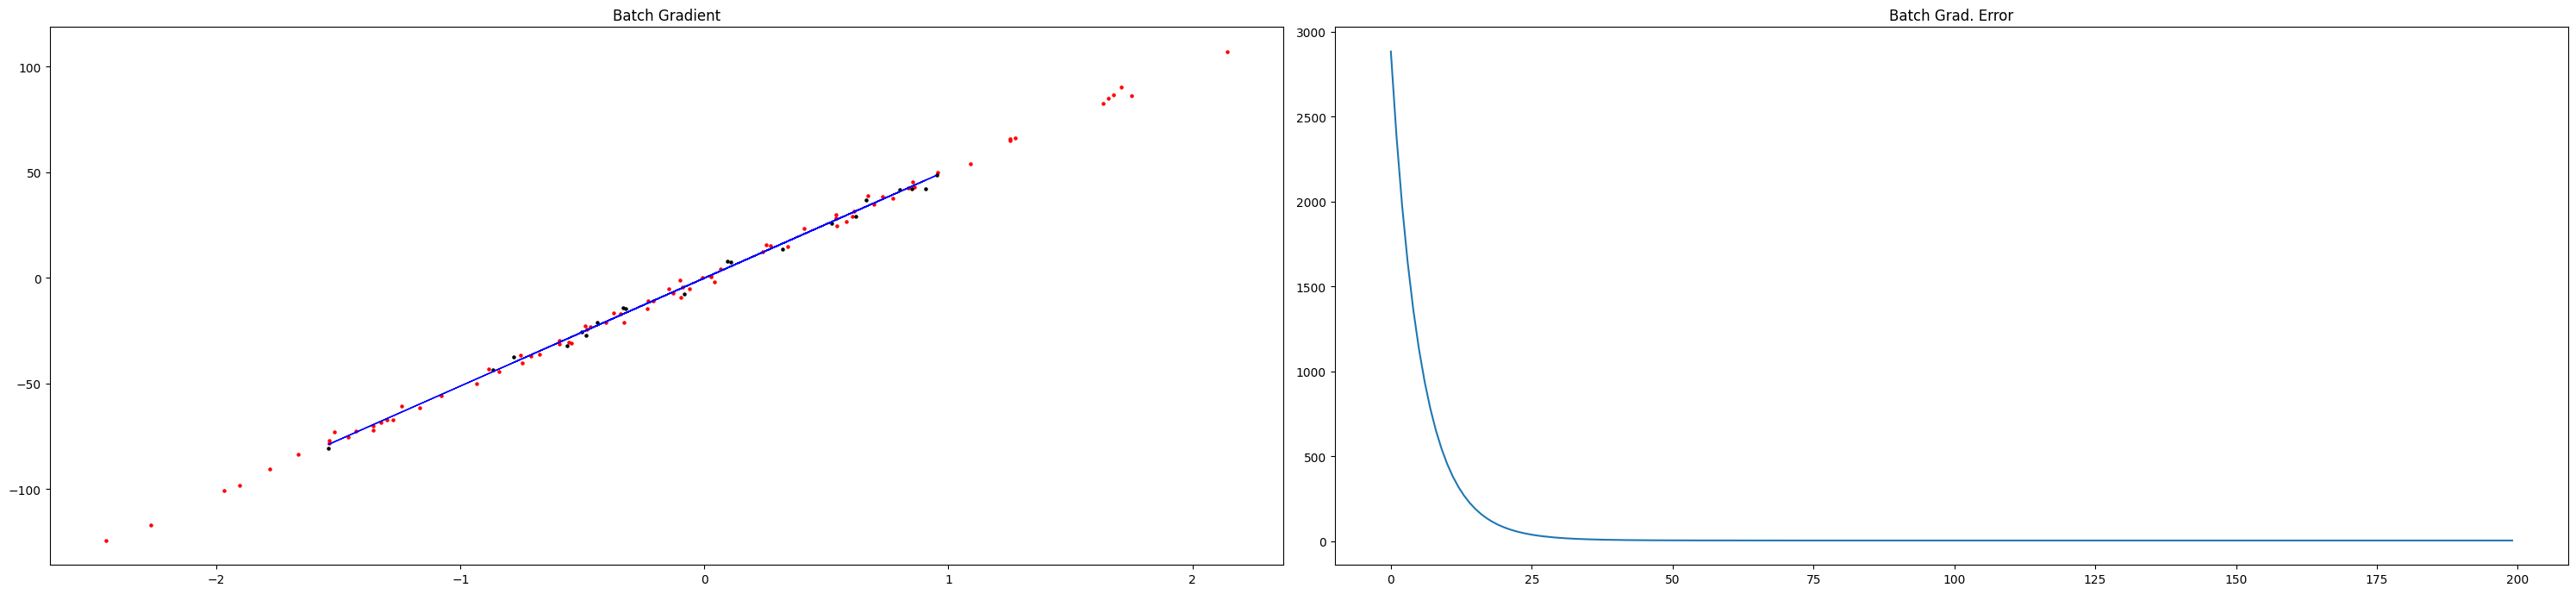

In [52]:
for i in range(len(errors)):
    points.append(i)

plt.figure(figsize=(30, 20))
plt.subplot( 3, 2, 5 )
plt.title("Batch Gradient")
plt.scatter(X_train, y_train, color="red",s=5)
plt.scatter(X_test, y_test, color="black",s=5)
plt.plot(X_test, predicts, color='blue', linewidth=1) # The line we learnt


plt.subplot( 3, 2, 6 )
plt.title("Batch Grad. Error")
plt.plot(points, errors)
plt.tight_layout()
plt.show()

## Multivariate Gradient Descent

1. Extend your gradient descent program to handle multiple features.
2. Again, test this against the performance of the scikit-learn builtin function using means squared error.

### Generating Data

In [59]:
num_features: int = 5
X, y = make_regression(n_samples=100, n_features=num_features, noise = 2)

### Splitting Data

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training

In [61]:
regr = linear_model.LinearRegression() 
regr.fit(X_train, y_train)

LinearRegression()

### Scores

In [62]:
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

print('Variance score: %.2f' % regr.score(X_test, y_test))

Mean squared error: 3.98
Variance score: 1.00


### Feature Augmentation

The code is modifying X_train and X_test by adding a new feature at the beginning of each sample.

This is a common trick in **linear regression** when using **gradient descent**. 
By adding `1` as the first feature, the bias term (`w0` or `intercept`) can be treated as just another weight in the weight vector.

Normally, the hypothesis function for a linear model is:

$$
y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
$$

By augmenting the input data with `1`, it transforms into:

$$
y = w_0(1) + w_1x_1 + w_2x_2 + ... + w_nx_n
$$

This allows the weights to be stored in a single vector `weights = [w0, w1, w2, ..., wn]`, and predictions can be computed using **matrix multiplication** instead of manually handling `w0` separately.

In [63]:
X_train=X_train.tolist()
y_train=y_train.tolist()
X_test=X_test.tolist()
y_test=y_test.tolist()
for i in range(len(X_train)):
	X_train[i]=[1] + X_train[i]

for i in range(len(X_test)):
	X_test[i] = [1] + X_test[i]

### Gradient Descent

Resetting Variables

In [64]:
weights=[0] * (num_features + 1) # list of weights
errors = []
points = []

Running Multivariate Gradient Decent 

In [65]:
for j in range(repeats):
	for i in range(len(X_train)):
		predict = 0
    	# Prediction
		for k in range(len(weights)):
			predict += (X_train[i][k] * weights[k])
	
		# Error
		error = y_train[i] - predict
		errors.append(error)             # Stash the error in an array

        # Update weights
		for k in range(len(weights)):
			weights[k] +=  ((alpha * error) * X_train[i][k])
     

for k in range(len(weights)):
	print ("w"+str(k)+": %2f" % weights[k])

w0: 0.003025
w1: 73.141334
w2: 40.983537
w3: 74.301103
w4: 67.335218
w5: 40.486511


Computing mean using testing data

In [66]:
predicts = []
mean_error = 0
for i in range(len(X_test)):
	
	# Prediction
	predict=0
	for k in range(len(weights)):
		predict +=  (X_test[i][k] * weights[k])
	predicts.append(predict)
	
	# Error
	error = (y_test[i] - predict) ** 2 # Computing squared error
	mean_error += error
	

mean_error = mean_error / len(X_test) # Computing mean squared error
print("Mean squared error: %2f" % mean_error)

Mean squared error: 3.983368


Plotting error evolution

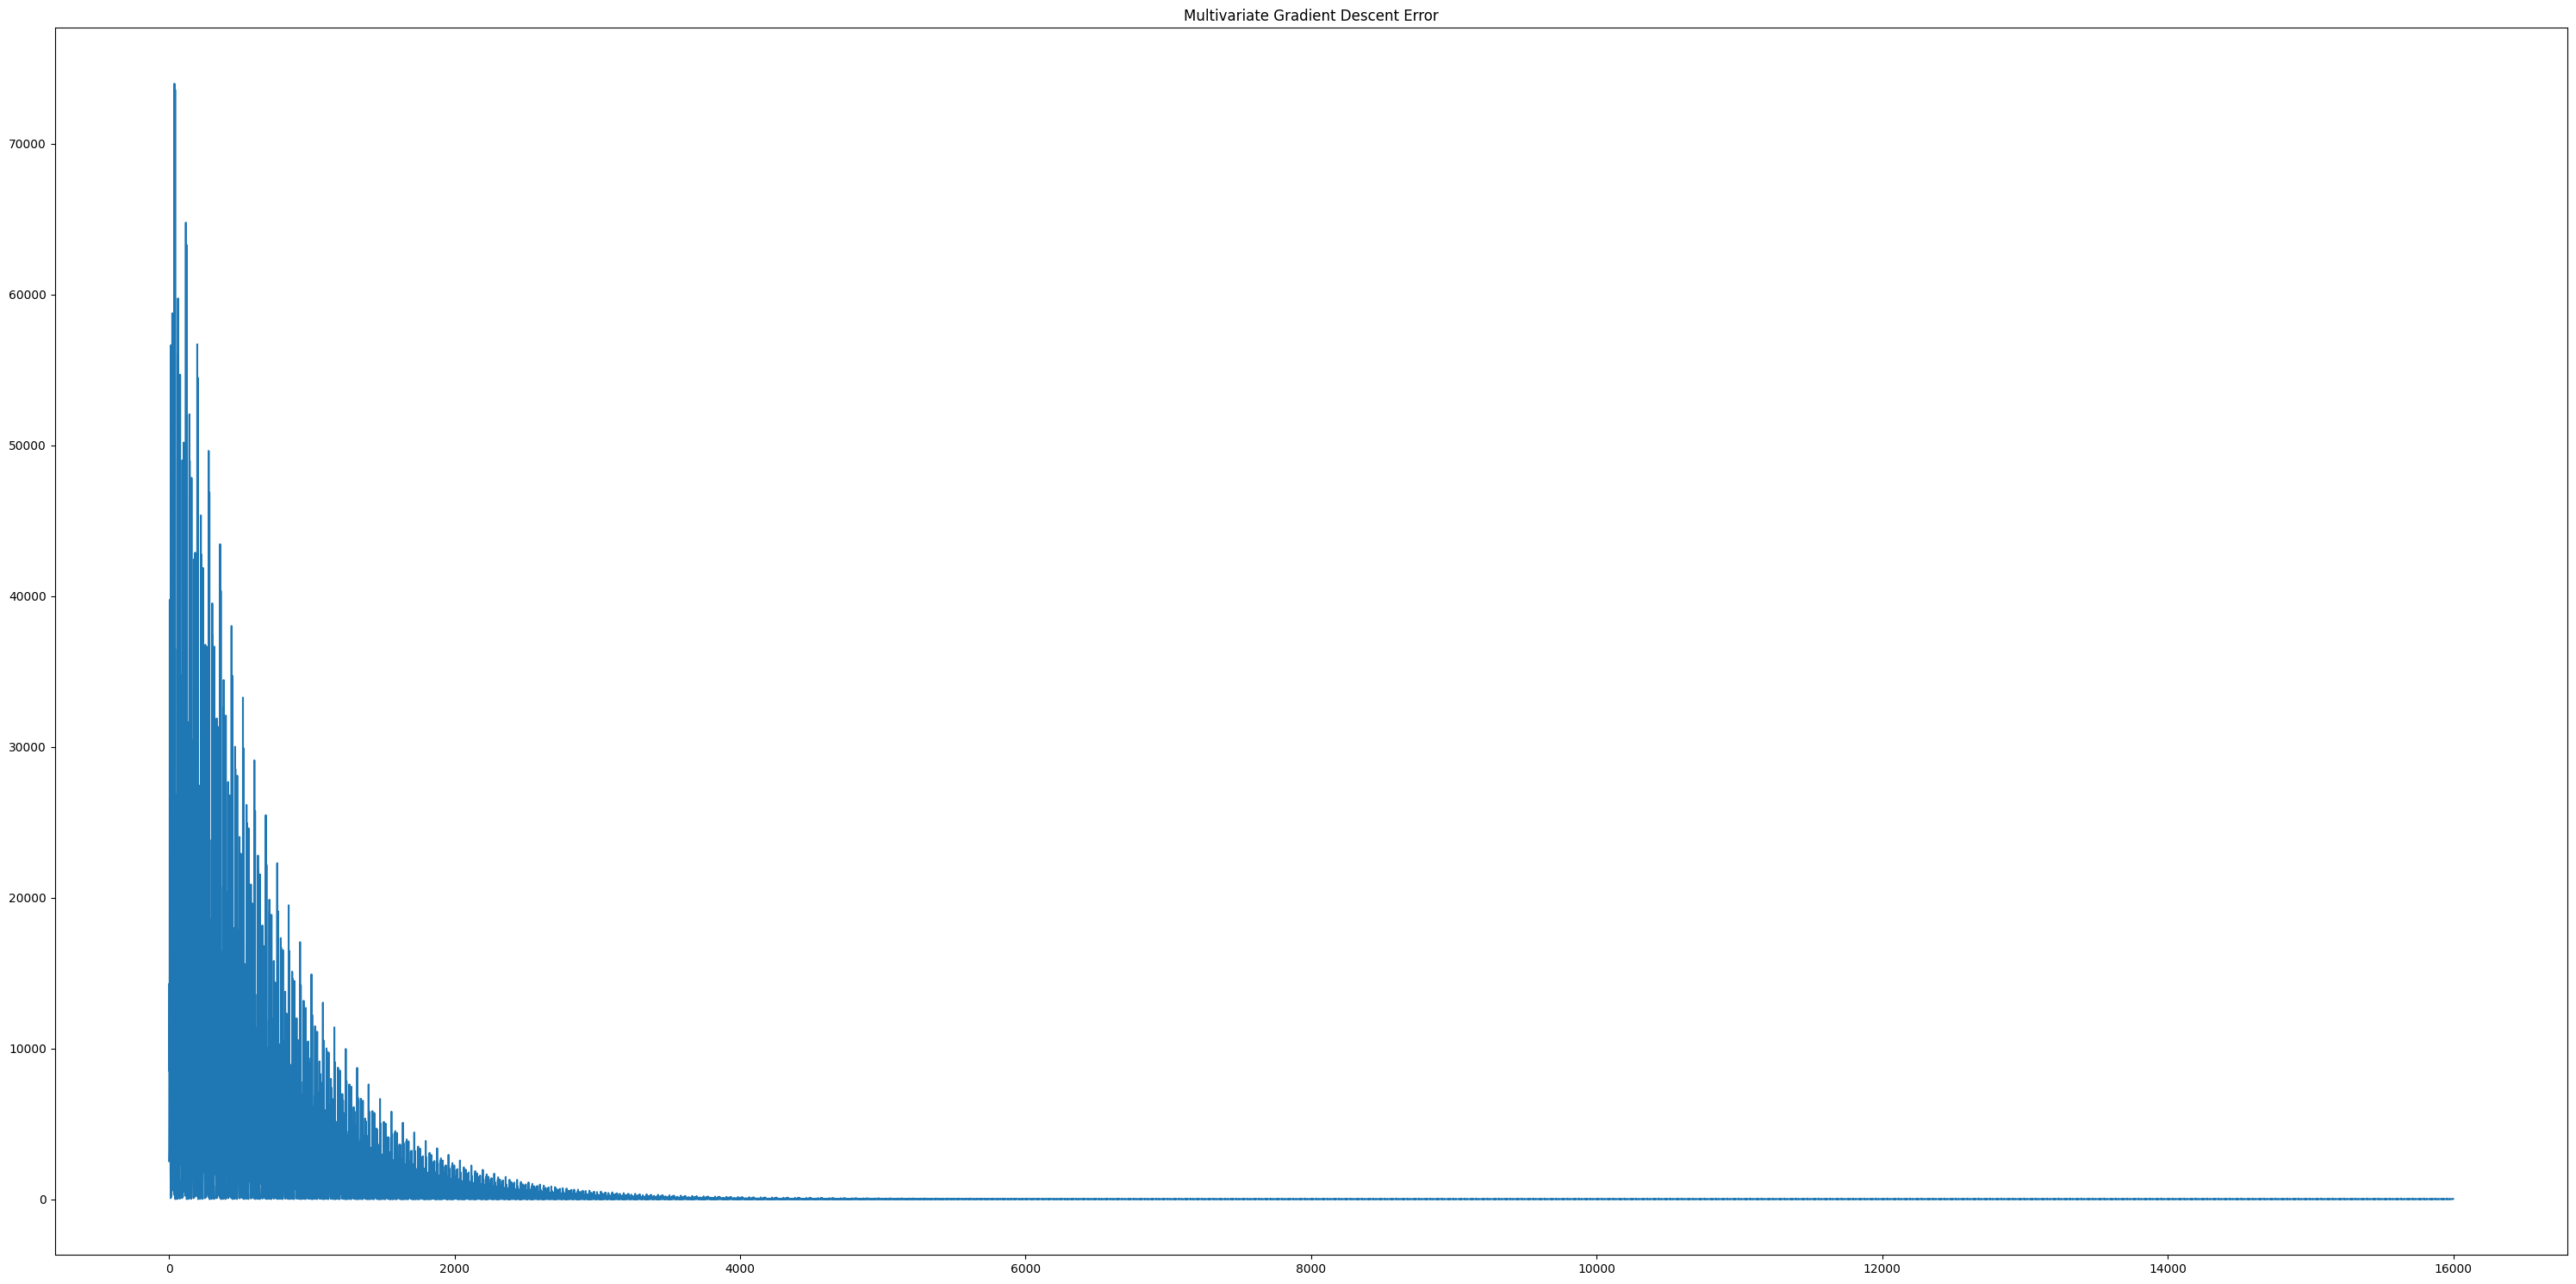

In [67]:
for i in range(len(errors)):
	errors[i] = errors[i]**2
	points.append(i)


plt.figure(figsize=(30, 15))
plt.title("Multivariate Gradient Descent Error")
plt.plot(points, errors)
plt.tight_layout()
plt.show()

# Extra

## Loading Boston Dataset

In [68]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

## Splitting Data

This is not a very linear dataset but extracting 5 features gives us something vaguely linear. 

In [69]:
X_train, X_test, y_train, y_test = train_test_split(housing.data[:, np.newaxis, 5], housing.target, test_size=0.2, random_state=0)

## Learning

In [70]:
regr = linear_model.LinearRegression() 
regr.fit(X_train, y_train)

LinearRegression()

## Compute mean using testing data

In [71]:
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

print('Variance score: %.2f' % regr.score(X_test, y_test))

Mean squared error: 1.31
Variance score: -0.01


## Augmentation

In [72]:
num_features: int = len(X_train[0])

X_train= X_train.tolist()
y_train= y_train.tolist() 
X_test= X_test.tolist()
y_test= y_test.tolist()


for i in range(len(X_train)):
	X_train[i] = [1] + X_train[i]

for i in range(len(X_test)):
	X_test[i] = [1] + X_test[i]

## Parameters

In [73]:
alpha = 0.001  # Learning rate
repeats = 1000

In [74]:
weights: list[int]=[0] * (num_features + 1) # list of weights
errors = []
points = []

## Gradient Descent

In [75]:
for j in range(repeats):
	for i in range(len(X_train)):
		predict = 0
    	# Prediction
		for k in range(len(weights)):
			predict += (X_train[i][k] * weights[k])
	
		# Error
		error = y_train[i] - predict
		errors.append(error) # Stash the error in an array

        # Update weights
		for k in range(len(weights)):
			weights[k] +=  ((alpha * error) * X_train[i][k])
     

for k in range(len(weights)):
	print ("w"+str(k)+": %2f" % weights[k])

w0: nan
w1: nan


## Compute mean using testing data

In [76]:
predicts = []
mean_error = 0

for i in range(len(X_test)):
	
	# Prediction
	predict = 0
	for k in range(len(weights)):
		predict +=  (X_test[i][k] * weights[k])
	predicts.append(predict)
	
	# Error
	error: float = (y_test[i] - predict) ** 2 # Computing squared error
	mean_error += error
	

mean_error: float = mean_error / len(X_test) # Computing mean squared error
print("Mean squared error: %2f" % mean_error)

Mean squared error: nan


## Ploting

In [78]:
for i in range(len(errors)):
	errors[i] = errors[i] ** 2
	points.append(i)


plt.figure(figsize=(30, 15))
plt.title("Multivariate Gradient Descent Error")
plt.plot(points, errors)
plt.tight_layout()
plt.show()

OverflowError: (34, 'Numerical result out of range')